In [60]:
from sklearn import decomposition
from nilearn import datasets, plotting
from graph import cal_graph
from esfMRI import Euler_distance, Manhattan_distance
import numpy as np
import networkx as nx
import pickle
import json
import os

In [4]:
atlas_labels = datasets.fetch_atlas_aal()['labels']
filename = "120_3"

In [73]:
with open("aal_translate.json", "r") as f:
    atlas_trans = json.load(f)
atlas_connection = np.array([[f"{atlas_trans[str(i+1)]} - {atlas_trans[str(j+1)]}" for j in range(116)] for i in range(116)])

In [48]:
with open(f"dFC/{filename}dFCs.pkl", "rb") as f:
    dFC = pickle.load(f)

In [50]:
dfcs_preop = []
dfcs_postop = []
for sub in dFC:
    for run in dFC[sub]["ses-preop"]:
        for fc in dFC[sub]["ses-preop"][run]:
            np.fill_diagonal(fc, 1)
        dfcs_preop.append(dFC[sub]["ses-preop"][run].reshape((-1, 116*116)))
    for run in dFC[sub]["ses-postop"]:
        for fc in dFC[sub]["ses-postop"][run]:
            np.fill_diagonal(fc, 1)
        dfcs_postop.append(dFC[sub]["ses-postop"][run].reshape((-1, 116*116)))
dfcs_preop = np.vstack(dfcs_preop)
dfcs_postop = np.vstack(dfcs_postop)
del dFC

In [52]:
pca_preop = decomposition.PCA(3).fit_transform(dfcs_preop.T)
pca_postop = decomposition.PCA(3).fit_transform(dfcs_postop.T)
os.makedirs("PCA", exist_ok=True)
with open(f"PCA/{filename}_fill1.pkl", "wb") as f:
    pickle.dump([pca_preop, pca_postop], f)

In [5]:
with open(f"PCA/{filename}_fill1.pkl", "rb") as f:
    pca_preop, pca_postop = pickle.load(f)

In [6]:
fcs_preop=pca_preop.T.reshape((-1,116,116))
fcs_postop=pca_postop.T.reshape((-1,116,116))

In [7]:
print([Euler_distance(fcs_preop[i], fcs_postop[i]) for i in range(3)])

[1414.6223671743357, 1143.5609393258874, 867.0167539480339]


In [9]:
pre = fcs_preop[0]
post = fcs_postop[0]

In [10]:
tmp = pre[1][1]

In [13]:
tmp

36.7627682191502

In [11]:
change = post - pre

In [37]:
change = np.abs(change)
np.fill_diagonal(change, 0)

In [38]:
change.max()

40.33668423226913

In [18]:
tmp = np.abs(change)

In [75]:
atlas_connection[change> change.max()*0.9][:atlas_connection[change> change.max()*0.9].shape[0]//2]

array(['补充运动区 - 补充运动区', '补充运动区 - 补充运动区', '内侧额上回 - 内侧额上回', '内侧额上回 - 内侧额上回',
       '前扣带和旁扣带脑回 - 前扣带和旁扣带脑回', '前扣带和旁扣带脑回 - 前扣带和旁扣带脑回',
       '内侧和旁扣带脑回 - 内侧和旁扣带脑回', '内侧和旁扣带脑回 - 内侧和旁扣带脑回', '距状裂周围皮层 - 距状裂周围皮层',
       '距状裂周围皮层 - 楔叶', '距状裂周围皮层 - 舌回', '距状裂周围皮层 - 距状裂周围皮层'], dtype='<U21')

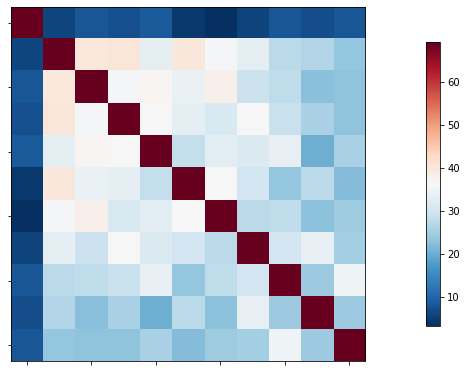

In [30]:
plotting.plot_matrix(np.abs(change)[41:52, 41:52])

In [12]:
change[1][1]

69.26927011437779

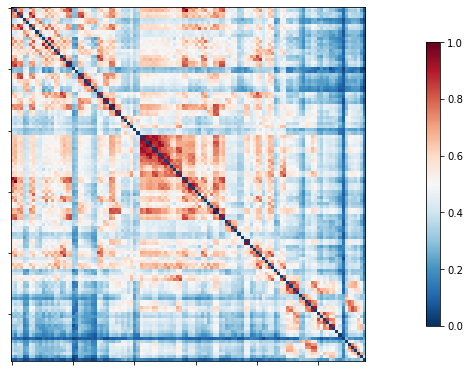

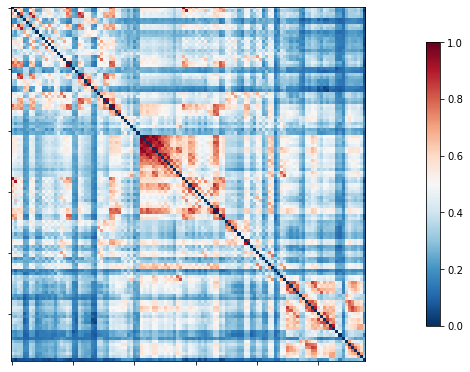

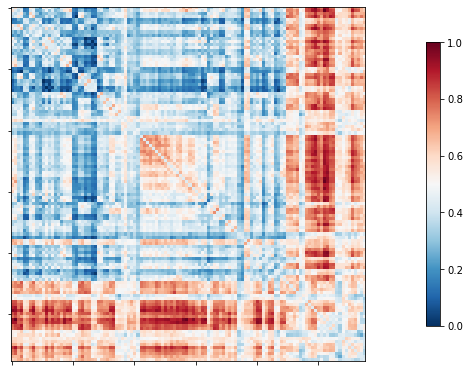

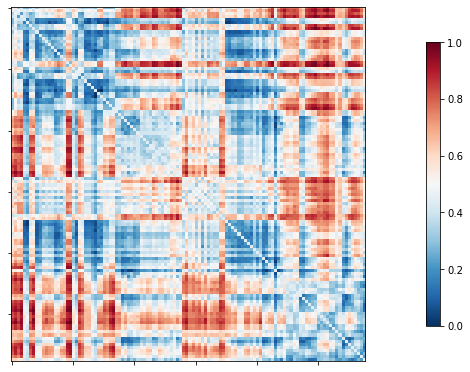

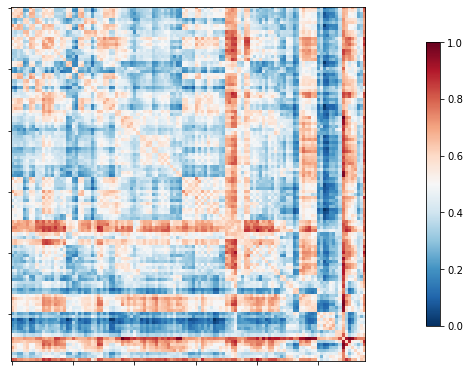

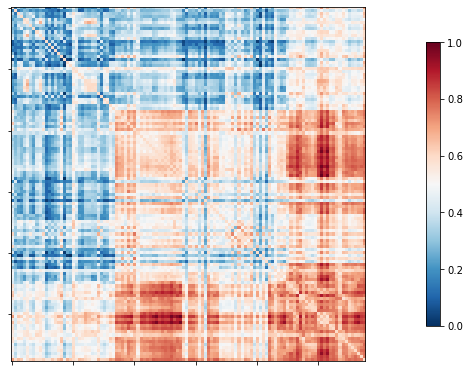

In [9]:
for i in range(3):
    # np.fill_diagonal(fcs_preop[i], 0)
    # 归一化
    fcs_preop[i] = (fcs_preop[i] - fcs_preop[i].min()) / (fcs_preop[i].max() - fcs_preop[i].min())
    plotting.plot_matrix(fcs_preop[i])
    # np.fill_diagonal(fcs_postop[i], 0)
    # 归一化
    fcs_postop[i] = (fcs_postop[i] - fcs_postop[i].min()) / (fcs_postop[i].max() - fcs_postop[i].min())
    plotting.plot_matrix(fcs_postop[i])

In [92]:
fc_change = fcs_postop - fcs_preop

In [96]:
fc_change[0].min()

-0.42590081488779385

In [60]:
fc_change[1][abs(fc_change[1]) < 0.5].shape

(7614,)

In [ ]:
for i in range(116):
    for j in range(116):
        if fc_change[0][i][j] > 0.9:
            print(atlas_labels[i], atlas_labels[j], fc_change[0])

In [21]:
fcgs_preop = []
fcgs_postop = []
for i in range(3):
    fcgs_preop.append(cal_graph(fcs_preop[i], 50))
    fcgs_postop.append(cal_graph(fcs_postop[i], 50))    
    print(fcgs_preop[i]["k_core"], fcgs_postop[i]["k_core"])
    print(sum(fcgs_preop[i]["clustering"].values())/116, sum(fcgs_postop[i]["clustering"].values())/116)
    print(fcgs_preop[i]["transitivity"], fcgs_postop[i]["transitivity"])
    print(fcgs_preop[i]["degree_assortativity_coefficient"], fcgs_postop[i]["degree_assortativity_coefficient"])
    print(fcgs_preop[i]["global_efficiency"], fcgs_postop[i]["global_efficiency"])
    print(fcgs_preop[i]["local_efficiency"], fcgs_postop[i]["local_efficiency"])
    print()

47 40
0.7759162936556843 0.7733292592408569
0.7647211234518854 0.7398308738980452
0.1428248902505283 0.06887301506130071
0.6782483758120991 0.6765617191404312
0.8788732907864016 0.8730967193058762

32 47
0.5953193244180395 0.8257706667228352
0.4400125897736702 0.7244951212920422
-0.6182901317937237 -0.19364207778036135
0.7050974512743629 0.7394302848575712
0.795828917060773 0.9128853333614176

37 59
0.7680193113199238 0.8549992366674912
0.6199401894418098 0.7920021632015383
-0.3079567923710132 -0.3282326603243167
0.69880059970015 0.7408795602198902
0.8840022032458181 0.914338766310176

